In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/math-for-machine-learning/main/3_normal_distribution/Exercise/bhp.csv")

In [17]:
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [18]:
df.shape

(13200, 7)

In [19]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [20]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

#### Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score



#### Also plot histogram to see how is the data distribution

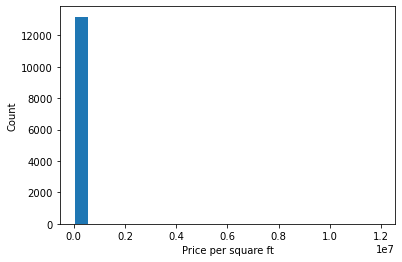

In [21]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

#### Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

#### Using log scale can make visualization little better

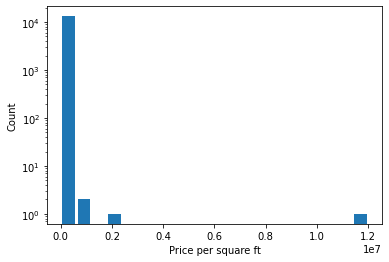

In [22]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()


#### You see atleast few bars on right hand side of our highest building at least :)



### 1. Removing Outliers by using percentiles

In [24]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [28]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

(28, 7)

#### Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point



In [26]:

df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]

In [27]:
df2.shape

(13172, 7)

In [30]:
df.shape[0]-df2.shape[0]

28

### So finally , we removed total 28 outliers

### (2) Now remove outliers using 4 standard deviation

In [31]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [32]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7262,other,4 Bedroom,1200.0,5.0,325.0,4,27083
11838,Vijayanagar,4 Bedroom,1500.0,4.0,360.0,4,24000
3873,other,5 Bedroom,1250.0,5.0,300.0,5,24000
3128,Malleshwaram,4 Bedroom,5500.0,5.0,1500.0,4,27272
3935,other,4 Bedroom,2360.0,4.0,600.0,4,25423
10465,Electronic City,4 Bedroom,1800.0,3.0,700.0,4,38888
12393,Electronic City Phase II,1 BHK,1200.0,1.0,295.0,1,24583
6524,other,3 Bedroom,700.0,3.0,195.0,3,27857
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500


In [33]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [34]:
df2.shape[0]-df3.shape[0]

125

### In this step we removed total 125 outliers

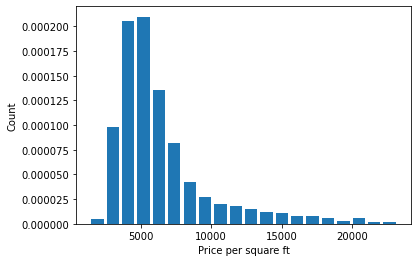

In [37]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

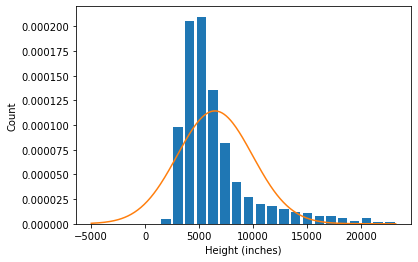

In [38]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

### (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [39]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-39-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
11583,Harlur,2 BHK,1197.0,2.0,76.00,2,6349,-0.075985
11619,Kathriguppe,3 BHK,1350.0,3.0,80.99,3,5999,-0.160505
1037,HSR Layout,2 BHK,1140.0,2.0,46.00,2,4035,-0.634784
4831,Electronic City Phase II,2 BHK,1140.0,2.0,33.06,2,2900,-0.908871
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.00,43,27500,5.031693
7804,Varthur Road,2 BHK,1255.0,2.0,52.76,2,4203,-0.594214
6738,other,2 BHK,1107.0,2.0,40.00,2,3613,-0.736691
7170,Rachenahalli,2 BHK,1050.0,2.0,55.50,2,5285,-0.332926
2063,Electronic City Phase II,2 BHK,1031.0,2.0,55.00,2,5334,-0.321093
11738,other,2 BHK,933.0,2.0,55.00,2,5894,-0.185861


In [40]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [41]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3873,other,5 Bedroom,1250.0,5.0,300.0,5,24000,4.186491
10536,other,4 Bedroom,2400.0,4.0,595.0,4,24791,4.377507
3128,Malleshwaram,4 Bedroom,5500.0,5.0,1500.0,4,27272,4.976634
5909,other,5 Bedroom,1240.0,5.0,300.0,5,24193,4.233098
6597,other,2 BHK,1030.0,2.0,300.0,2,29126,5.424350


In [42]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [43]:
df2.shape[0] - df4.shape[0]

125

#### In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation